<a href="https://colab.research.google.com/github/jd2504/bme_dsp_2025/blob/main/09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import os
# import sys

# bme_repo = "https://github.com/jd2504/bme_dsp_2025.git"
# repo_name = bme_repo.split('/')[-1].replace('.git', '')
# !git clone {bme_repo}
# sys.path.append(os.path.join(os.getcwd(), repo_name))
# import bmedsp_helpers as bme

# Stochastic process - filtering

Filtering shapes the power spectrum

In [ ]:
import numpy as np
from scipy import stats, signal, fft
from matplotlib import pyplot as plt
from IPython.display import Audio

In [ ]:
# fs = 44100

# amp = 0.5
# dur = 5

# n = int(fs*dur)
# x = amp * np.random.randn(n)

# Audio(x, rate=fs)

`pwelch(x*sqrt(pi), [],[],128)`

`abs(fft(h,N)).^2/N` ... (`.^` element-wise power)

Slide 25 ARMA process

$ H(z) = \frac{1+0.9025z^{−2}}{1−0.5562z^{−1}+0.81z^{−2}} $

# generate noise

In [ ]:
# params
N = 4092
fs = 2 # norm... so nyq=1
# b=1+0.9025z−2
# a=1−0.5562z−1+0.81z−2
b = [1, 0, 0.9025]
a = [1, -0.5562, 0.81]

v = np.random.randn(N)
x = signal.lfilter(b, a, v)

# freq domain

In [ ]:
# white noise
# psd_w = np.zeros(len(v))

# H(z) - white... do nothing
w_w, h_w = signal.freqz(1,1,worN=N//2, fs=fs)
psd_w = np.abs(h_w)**2
psd_w = 10*np.log10(psd_w)

# H(z)
w, h = signal.freqz(b, a, worN=N//2, fs=fs)
psd = np.abs(h)**2
psd_db = 10* np.log10(psd)

# raw |fft(x)|^2 / N
Vn = np.fft.fft(v)
Vn = ((np.abs(Vn)**2) / N)
Vn = 10*np.log10(Vn)

Xn = np.fft.fft(x)
Xn = ((np.abs(Xn)**2) / N)
Xn = 10*np.log10(Xn)


nps=128

f, Pxx_v = signal.welch(v, fs, nperseg=nps)
Pxx_v_db = 10*np.log10(Pxx_v)

f, Pxx_x = signal.welch(x, fs, nperseg=nps)
Pxx_x_db = 10*np.log10(Pxx_x)

# plots

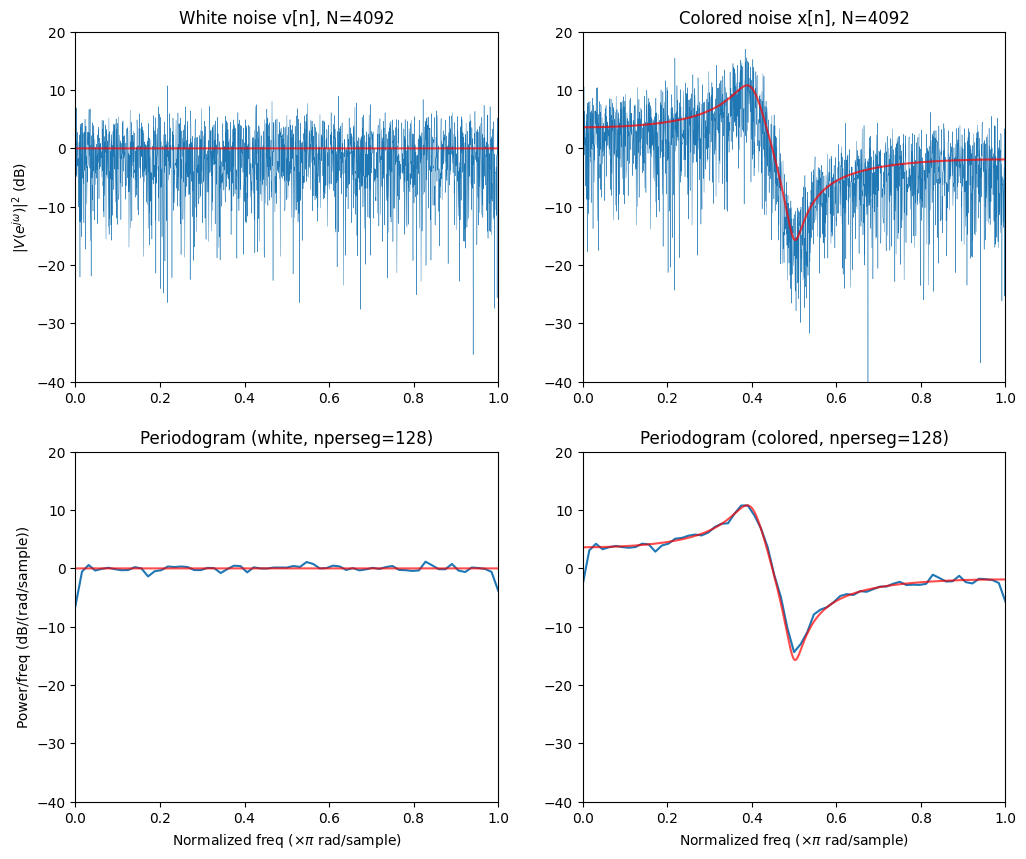

In [ ]:
f_ax = np.linspace(0, 1, N//2)
f_ax_welch = np.linspace(0, 1, nps//2+1)

ylim_shared = [-40,20]
xlim_shared = [0,1]

plt.figure(figsize=(12,10))

plt.subplot(2,2,1) # white periodogram
plt.plot(f_ax, Vn[:N//2], lw=0.3)
plt.plot(f_ax, psd_w, c='r', alpha=0.7)
plt.title(f"White noise v[n], N={N}")
plt.ylabel(r'$|V(e^{j\omega})|^2$ (dB)')
plt.ylim(ylim_shared)
plt.xlim(xlim_shared)

plt.subplot(2,2,2) # colored periodogram
plt.plot(f_ax, Xn[:N//2], lw=0.3)
plt.plot(f_ax, psd_db, c='r', alpha=0.7)
plt.title(f"Colored noise x[n], N={N}")
# plt.ylabel(r'$|X(e^{j\omega})|^2$ (dB)')
plt.ylim(ylim_shared)
plt.xlim(xlim_shared)

plt.subplot(2,2,3) # white psd welch
plt.plot(f_ax_welch, Pxx_v_db)
plt.plot(f_ax, psd_w, c='r', alpha=0.7)
plt.title(f'Periodogram (white, nperseg={nps})')
plt.ylabel('Power/freq (dB/(rad/sample))')
plt.xlabel(r'Normalized freq ($\times \pi$ rad/sample)')
plt.ylim(ylim_shared)
plt.xlim(xlim_shared)

plt.subplot(2,2,4) # colored psd welch
plt.plot(f_ax_welch, Pxx_x_db)
plt.plot(f_ax, psd_db, c='r', alpha=0.7)
plt.title(f'Periodogram (colored, nperseg={nps})')
# plt.ylabel('Power/freq (dB/(rad/sample))')
plt.xlabel(r'Normalized freq ($\times \pi$ rad/sample)')
plt.ylim(ylim_shared)
plt.xlim(xlim_shared)

plt.show()